In [1]:
#import libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
r = requests.get('http://swapi.dev/api/')
r.json()

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

Get Full Data of a type (people, planets, vehicles...)

In [3]:
#function to store all the data
def get_full_type_data(base_url):
    data =  requests.get(base_url)
    all_data = []
    data_num = 0
    for i in range(200):
        if data_num < data.json()['count']+1:
            trial=requests.get(base_url+str(i))
            if str(trial) != '<Response [404]>':
                all_data.append(trial.json())
                data_num+=1
    all_data = pd.json_normalize(all_data)
    return all_data

In [4]:
#function to make column numeric
def df_columns_to_numeric(df,columns):
    for column_i in columns:
        unusual_index_list = df.index[df[column_i].str.contains("\D")].tolist()
        # Rule out the unusual charactor in a numeric column
        if len(unusual_index_list)>0:
            df.loc[unusual_index_list,column_i]=np.nan
        df[column_i]=pd.to_numeric(df[column_i])
    return df

PEOPLE

In [5]:
#get and store the people data
people = get_full_type_data('https://swapi.dev/api/people/')

In [6]:
people

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


In [7]:
#return columns name
people.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url'],
      dtype='object')

In [8]:
# add 3 columns about the number of films , vehicles , starships
people['film_num']=people['films'].apply(lambda x:len(x))
people['vehicles_num']=people['vehicles'].apply(lambda x:len(x))
people['starships_num']=people['starships'].apply(lambda x:len(x))
people

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,film_num,vehicles_num,starships_num
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,4,2,2
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,6,0,0
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,6,0,0
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,4,0,1
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/,1,1,1
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/,1,0,0
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/,2,0,0
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/,2,0,0


In [9]:
#see the last 3 rows
people.tail(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,film_num,vehicles_num,starships_num
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/,2,0,0
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/,2,0,0
81,Tion Medon,206,80,none,grey,black,unknown,male,https://swapi.dev/api/planets/12/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/37/],[],[],2014-12-20T20:35:04.260000Z,2014-12-20T21:17:50.498000Z,https://swapi.dev/api/people/83/,1,0,0


In [10]:
#get dataset info
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           82 non-null     object
 1   height         82 non-null     object
 2   mass           82 non-null     object
 3   hair_color     82 non-null     object
 4   skin_color     82 non-null     object
 5   eye_color      82 non-null     object
 6   birth_year     82 non-null     object
 7   gender         82 non-null     object
 8   homeworld      82 non-null     object
 9   films          82 non-null     object
 10  species        82 non-null     object
 11  vehicles       82 non-null     object
 12  starships      82 non-null     object
 13  created        82 non-null     object
 14  edited         82 non-null     object
 15  url            82 non-null     object
 16  film_num       82 non-null     int64 
 17  vehicles_num   82 non-null     int64 
 18  starships_num  82 non-null     i

In [11]:
# change the mass and height columns tybe to numeric type
people = df_columns_to_numeric(people,['height','mass'])

In [12]:
#describe the final data
people.describe()

,height,mass,film_num,vehicles_num,starships_num
count,81.000000,56.000000,82.000000,82.000000,82.000000
mean,174.604938,75.875000,1.975610,0.158537,0.365854
std,34.774157,29.661155,1.305029,0.429456,0.839050
min,66.000000,15.000000,1.000000,0.000000,0.000000
25%,167.000000,55.000000,1.000000,0.000000,0.000000
50%,180.000000,79.000000,1.000000,0.000000,0.000000
75%,191.000000,84.250000,3.000000,0.000000,0.000000
max,264.000000,159.000000,6.000000,2.000000,5.000000


In [13]:
people = people.drop(columns=['created', 'edited'])

In [14]:
# Find the greatest mass and the name og who has it
print(people.iloc[people['mass'].idxmax()]['name'],people['mass'].max())

Grievous 159.0


In [15]:
#find the number of empty values in each column
#26 in mass and 1 in heigh
people.isnull().sum()

name              0
height            1
mass             26
hair_color        0
skin_color        0
eye_color         0
birth_year        0
gender            0
homeworld         0
films             0
species           0
vehicles          0
starships         0
url               0
film_num          0
vehicles_num      0
starships_num     0
dtype: int64

In [16]:
#find all kindes of skin
people['skin_color'].unique()

array(['fair', 'gold', 'white, blue', 'white', 'light', 'white, red',
       'unknown', 'green', 'green-tan, brown', 'pale', 'metal', 'dark',
       'brown mottle', 'brown', 'grey', 'mottled green', 'orange',
       'blue, grey', 'grey, red', 'red', 'blue', 'grey, blue',
       'grey, green, yellow', 'yellow', 'tan', 'fair, green, yellow',
       'silver, red', 'green, grey', 'red, blue, white', 'brown, white'],
      dtype=object)

In [17]:
#replace the missing values to np.nan to make it more understandable
missing_values=['??','na','X','999999']
people=people.replace(missing_values,np.NaN)
people

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,film_num,vehicles_num,starships_num
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",https://swapi.dev/api/people/1/,4,2,2
1,C-3PO,167.0,75.0,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/2/,6,0,0
2,R2-D2,96.0,32.0,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/3/,6,0,0
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],https://swapi.dev/api/people/4/,4,0,1
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],https://swapi.dev/api/people/5/,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216.0,159.0,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],https://swapi.dev/api/people/79/,1,1,1
78,Tarfful,234.0,136.0,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],https://swapi.dev/api/people/80/,1,0,0
79,Raymus Antilles,188.0,79.0,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],https://swapi.dev/api/people/81/,2,0,0
80,Sly Moore,178.0,48.0,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],https://swapi.dev/api/people/82/,2,0,0


In [18]:
#fill the empty values in mass and height columns with the mean and median values of all data
m=people["mass"].mean()
h=people["height"].median()
people["mass"].fillna(m,inplace=True)
people["height"].fillna(h,inplace=True)
people["height"]


0     172.0
1     167.0
2      96.0
3     202.0
4     150.0
      ...  
77    216.0
78    234.0
79    188.0
80    178.0
81    206.0
Name: height, Length: 82, dtype: float64

In [19]:
# sort data by mass and height columns in ascending for mass...and show the first of the data
people.sort_values(by=["mass", "height"], ascending=[True, False]).head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,film_num,vehicles_num,starships_num
45,Ratts Tyerel,79.0,15.0,none,"grey, blue",unknown,unknown,male,https://swapi.dev/api/planets/38/,[https://swapi.dev/api/films/4/],[https://swapi.dev/api/species/16/],[],[],https://swapi.dev/api/people/47/,1,0,0
18,Yoda,66.0,17.0,white,green,brown,896BBY,male,https://swapi.dev/api/planets/28/,"[https://swapi.dev/api/films/2/, https://swapi...",[https://swapi.dev/api/species/6/],[],[],https://swapi.dev/api/people/20/,5,0,0
28,Wicket Systri Warrick,88.0,20.0,brown,brown,brown,8BBY,male,https://swapi.dev/api/planets/7/,[https://swapi.dev/api/films/3/],[https://swapi.dev/api/species/9/],[],[],https://swapi.dev/api/people/30/,1,0,0
7,R5-D4,97.0,32.0,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/8/,1,0,0
2,R2-D2,96.0,32.0,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],https://swapi.dev/api/people/3/,6,0,0


In [20]:
#find the male people with brown skin color
people[(people["gender"] == 'male') & (people["skin_color"] == "brown")]['name']

28    Wicket Systri Warrick
52                Eeth Koth
69          Dexter Jettster
78                  Tarfful
Name: name, dtype: object

In [21]:
top_home_world_people = people[people['homeworld']=='https://swapi.dev/api/planets/20/']
top_home_world_people

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,film_num,vehicles_num,starships_num
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",https://swapi.dev/api/people/10/,6,1,5


PLANETS

In [22]:
planets = requests.get('http://swapi.dev/api/planets')

planets.json()

{'count': 60,
 'next': 'https://swapi.dev/api/planets/?page=2',
 'previous': None,
 'results': [{'name': 'Tatooine',
   'rotation_period': '23',
   'orbital_period': '304',
   'diameter': '10465',
   'climate': 'arid',
   'gravity': '1 standard',
   'terrain': 'desert',
   'surface_water': '1',
   'population': '200000',
   'residents': ['https://swapi.dev/api/people/1/',
    'https://swapi.dev/api/people/2/',
    'https://swapi.dev/api/people/4/',
    'https://swapi.dev/api/people/6/',
    'https://swapi.dev/api/people/7/',
    'https://swapi.dev/api/people/8/',
    'https://swapi.dev/api/people/9/',
    'https://swapi.dev/api/people/11/',
    'https://swapi.dev/api/people/43/',
    'https://swapi.dev/api/people/62/'],
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/4/',
    'https://swapi.dev/api/films/5/',
    'https://swapi.dev/api/films/6/'],
   'created': '2014-12-09T13:50:49.641000Z',
   'edited': '2014-12-20T

In [23]:
planets = get_full_type_data('http://swapi.dev/api/planets/')
print("Number of planets",planets.shape[0])

Number of planets 60


In [24]:
planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [25]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


In [26]:
#find  the planets which has temperate climate and how many surface_water for each one
planets.loc[planets.climate.str.contains('temperate'), 'surface_water']

1          40
2           8
5           0
6           8
7          12
8     unknown
9         100
10          5
11        0.9
14          0
17    unknown
19    unknown
21         70
23    unknown
24    unknown
25         98
26         10
30        100
31         40
33    unknown
34    unknown
35    unknown
36          5
38    unknown
41    unknown
42         20
43         80
48    unknown
49    unknown
55    unknown
56         25
57    unknown
58    unknown
Name: surface_water, dtype: object

In [27]:
#sort plantes by population
planets.sort_values(by="population", ascending=False)



,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
59,Umbara,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.dev/api/people/82/],[],2014-12-20T20:18:36.256000Z,2014-12-20T20:58:18.525000Z,https://swapi.dev/api/planets/60/
53,Zolan,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.dev/api/people/70/],[],2014-12-20T16:56:37.250000Z,2014-12-20T20:58:18.514000Z,https://swapi.dev/api/planets/54/
37,Aleen Minor,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.dev/api/people/47/],[],2014-12-20T09:52:23.452000Z,2014-12-20T20:58:18.483000Z,https://swapi.dev/api/planets/38/
44,Iridonia,29,413,unknown,unknown,unknown,"rocky canyons, acid pools",unknown,unknown,[https://swapi.dev/api/people/54/],[],2014-12-20T10:26:05.788000Z,2014-12-20T20:58:18.497000Z,https://swapi.dev/api/planets/45/
45,Tholoth,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[],[],2014-12-20T10:28:31.117000Z,2014-12-20T20:58:18.498000Z,https://swapi.dev/api/planets/46/
46,Iktotch,22,481,unknown,"arid, rocky, windy",1,rocky,unknown,unknown,[https://swapi.dev/api/people/56/],[],2014-12-20T10:31:32.413000Z,2014-12-20T20:58:18.500000Z,https://swapi.dev/api/planets/47/
27,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,"[https://swapi.dev/api/people/20/, https://swa...",[],2014-12-15T12:25:59.569000Z,2014-12-20T20:58:18.466000Z,https://swapi.dev/api/planets/28/
47,Quermia,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[https://swapi.dev/api/people/57/],[],2014-12-20T10:34:08.249000Z,2014-12-20T20:58:18.502000Z,https://swapi.dev/api/planets/48/
48,Dorin,22,409,13400,temperate,1,unknown,unknown,unknown,[https://swapi.dev/api/people/58/],[],2014-12-20T10:48:36.141000Z,2014-12-20T20:58:18.504000Z,https://swapi.dev/api/planets/49/
39,Troiken,unknown,unknown,unknown,unknown,unknown,"desert, tundra, rainforests, mountains",unknown,unknown,[https://swapi.dev/api/people/49/],[],2014-12-20T10:01:37.395000Z,2014-12-20T20:58:18.487000Z,https://swapi.dev/api/planets/40/


In [28]:
#fined all climate kinds
planets['climate'].unique()

array(['arid', 'temperate', 'temperate, tropical', 'frozen', 'murky',
       'temperate, arid', 'temperate, arid, windy', 'hot', 'tropical',
       'artificial temperate ', 'frigid', 'hot, humid',
       'temperate, moist', 'polluted', 'unknown', 'superheated',
       'arid, temperate, tropical', 'temperate, arid, subartic',
       'temperate, artic', 'tropical, temperate', 'arid, rocky, windy'],
      dtype=object)

In [29]:
#change the type og those colummns to easy calculate
planets = df_columns_to_numeric(planets,["rotation_period",'orbital_period','diameter','surface_water','population'])

planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             60 non-null     object 
 1   rotation_period  48 non-null     float64
 2   orbital_period   48 non-null     float64
 3   diameter         44 non-null     float64
 4   climate          60 non-null     object 
 5   gravity          60 non-null     object 
 6   terrain          60 non-null     object 
 7   surface_water    25 non-null     float64
 8   population       43 non-null     float64
 9   residents        60 non-null     object 
 10  films            60 non-null     object 
 11  created          60 non-null     object 
 12  edited           60 non-null     object 
 13  url              60 non-null     object 
dtypes: float64(5), object(9)
memory usage: 6.7+ KB


In [30]:
missing_values=['??','Na','X','999999','unknown']
planets=planets.replace(missing_values,np.NaN)


In [31]:
planets.describe()

,rotation_period,orbital_period,diameter,surface_water,population
count,48.000000,48.000000,44.000000,25.000000,4.300000e+01
mean,25.958333,577.625000,12388.340909,38.200000,3.980003e+10
std,11.185017,953.304904,17045.948720,38.923001,1.685799e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,22.750000,310.250000,7812.250000,5.000000,1.050000e+07
50%,25.000000,374.500000,11015.000000,20.000000,5.000000e+08
75%,27.000000,412.000000,13422.500000,70.000000,3.750000e+09
max,87.000000,5110.000000,118000.000000,100.000000,1.000000e+12


In [32]:
planets.isnull().sum()

name                1
rotation_period    12
orbital_period     12
diameter           16
climate            12
gravity            15
terrain             7
surface_water      35
population         17
residents           0
films               0
created             0
edited              0
url                 0
dtype: int64

In [33]:
#fill the empty values of these columns by the mean
planets["rotation_period"].fillna(planets["rotation_period"].mean(),inplace=True)
planets["orbital_period"].fillna(planets["orbital_period"].mean(),inplace=True)
planets["diameter"].fillna(planets["diameter"].mean(),inplace=True)
planets["surface_water"].fillna(planets["surface_water"].mean(),inplace=True)
planets["population"].fillna(planets["population"].mean(),inplace=True)


In [34]:
planets.isnull().sum()

name                1
rotation_period     0
orbital_period      0
diameter            0
climate            12
gravity            15
terrain             7
surface_water       0
population          0
residents           0
films               0
created             0
edited              0
url                 0
dtype: int64

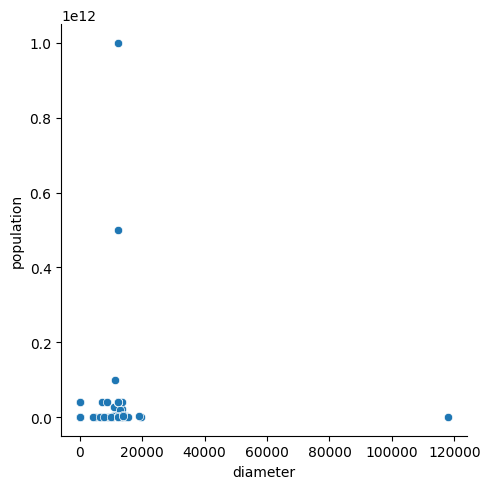

In [35]:
#relationship between populationand diameterS
sns.relplot( x=planets["diameter"], y=planets["population"])

Films

In [36]:
films= get_full_type_data('http://swapi.dev/api/films/')
print("Number of films",films.shape[0])

Number of films 6


In [37]:
films.head()

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/4/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/4/, https://swa...","[https://swapi.dev/api/starships/3/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/
3,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/31/, https://...","[https://swapi.dev/api/vehicles/33/, https://s...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-19T16:52:55.740000Z,2014-12-20T10:54:07.216000Z,https://swapi.dev/api/films/4/
4,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/21/, https://...","[https://swapi.dev/api/vehicles/4/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-20T10:57:57.886000Z,2014-12-20T20:18:48.516000Z,https://swapi.dev/api/films/5/


In [38]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6 non-null      object
 1   episode_id     6 non-null      int64 
 2   opening_crawl  6 non-null      object
 3   director       6 non-null      object
 4   producer       6 non-null      object
 5   release_date   6 non-null      object
 6   characters     6 non-null      object
 7   planets        6 non-null      object
 8   starships      6 non-null      object
 9   vehicles       6 non-null      object
 10  species        6 non-null      object
 11  created        6 non-null      object
 12  edited         6 non-null      object
 13  url            6 non-null      object
dtypes: int64(1), object(13)
memory usage: 800.0+ bytes


In [39]:
films.columns

Index(['title', 'episode_id', 'opening_crawl', 'director', 'producer',
       'release_date', 'characters', 'planets', 'starships', 'vehicles',
       'species', 'created', 'edited', 'url'],
      dtype='object')

In [40]:
films.describe()


,episode_id
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [41]:
films.isnull().sum()


title            0
episode_id       0
opening_crawl    0
director         0
producer         0
release_date     0
characters       0
planets          0
starships        0
vehicles         0
species          0
created          0
edited           0
url              0
dtype: int64

In [42]:
missing_values=['??','na','X','999999']
films=films.replace(missing_values,np.NaN)


Speicies

In [43]:
species= get_full_type_data('http://swapi.dev/api/species/')
print("Number of films",species.shape[0])

Number of films 37


Vehicles

In [44]:
vehicles = get_full_type_data('http://swapi.dev/api/vehicles/')
print("Number of vehicles",vehicles.shape[0])

Number of vehicles 39


Starships

In [45]:
starships= get_full_type_data('http://swapi.dev/api/starships/')
print("Number of starships",starships.shape[0])

Number of starships 36
